# Практическое задание к уроку 6. Градиентный бустинг

In [1]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np

## 1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. 
Сделать выводы о зависимости ошибки от этих параметров.

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [6]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [64]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [65]:
eta = 0.01
max_depth = 10
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

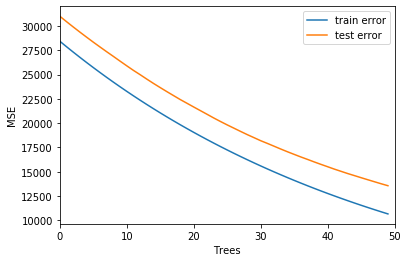

In [66]:
get_error_plot(n_trees, train_errors, test_errors)

In [59]:
eta = 0.01
max_depth = 20
# Число деревьев в ансамбле
n_trees =10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

depth=[]
tr_er=[]
test_er=[]
for j in range(1, max_depth):
    tree, train_errors, test_errors = gb_fit(n_trees, j, X_train, X_test, y_train, y_test, coefs, eta)
    depth.append(j)
    tr_er.append(train_errors[len(train_errors)-1])
    test_er.append(test_errors[len(test_errors)-1])

In [62]:
def get_error_plot_depth(depth, train_err, test_err):
    plt.xlabel('depth')
    plt.ylabel('MSE')
    plt.plot(depth, train_err, label='train error')
    plt.plot(depth, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

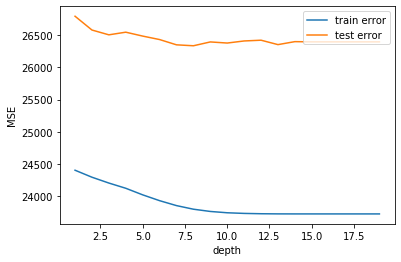

In [63]:
get_error_plot_depth(depth, tr_er, test_er)

Вывод: При увеличении количества деревьев ошибка на тестовой выборки и на трейне снижается, но с увеличением числа деревьев расхождение ошибки увеличивается модель постепенно приходит к переобучению. При увеличении глубины дерева точность достигается при некоторой глубине далее увеличения глубины нецелесообразно. Комбинируя параметры глубины и количества деоевьев можно подобрать неплохую точность модели 

## 2*. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. 
    Сравнить на одном графике кривые  изменения ошибки на тестовой выборке в зависимости от  числа итераций.

In [124]:
def gb_fit_stohastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    

    for i in range(n_trees):
        train_ind = np.random.randint(X_train.shape[0],size=int(X_train.shape[0]/2))
        X_train_=X_train[train_ind]
        y_train_=y_train[train_ind]
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_, y_train_)
            
            train_errors.append(mean_squared_error(y_train_, gb_predict(X_train_, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train_, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_, bias(y_train_, target))
            
            train_errors.append(mean_squared_error(y_train_, gb_predict(X_train_, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [125]:
eta = 0.01
max_depth = 10
# Число деревьев в ансамбле
n_trees = 50

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

trees_st, train_errors_st, test_errors_st = gb_fit_stohastic(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [128]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='test error')
    plt.plot(list(range(n_trees)), test_err, label='test error stohastic')
    plt.legend(loc='upper right')
    plt.show()

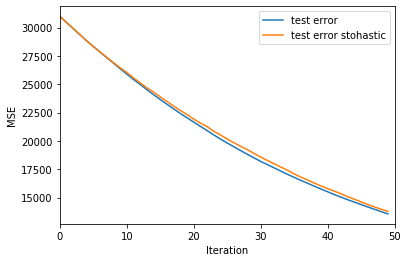

In [129]:
get_error_plot(n_trees, test_errors, test_errors_st)

Вывод: В данном случаи стохастический градиентный бустинг показал результат сопоставимый с качеством основной модели по числу итераций
хотя обычно для достижения нужной точности стохастическому методу нужно больше итераций.      